In [1]:
import pandas as pd

**Научимся считать метрики в pandas-табличках**

Представим, что 2 добрых и очень-очень умных гнома прокрались к нам в данные, описывающие различные поездки в такси.
Далее, для каждого объекта (и его признаков, соответственно), гномы построили модели предсказания того, какая должна была быть у данных заказов длительность исполнения. Прогнозы своих моделей они положили соответственно в колонки **prediction_1** и **prediction_2**

In [2]:
df = pd.read_csv('taxi_dataset_with_predictions.csv', index_col=0)

In [42]:
df.head(10)

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km,prediction_1,prediction_2,error_1,error_category_1
id,,,,,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479,578.156451,355.270710,123.156451,over-prediction
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119,962.657188,674.295781,299.657188,over-prediction
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080,2546.180515,2422.132431,422.180515,over-prediction
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155,737.926214,795.992362,308.926214,over-prediction
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925,666.070794,0.000000,231.070794,over-prediction
id0801584,1,2016-01-30 22:01:40,1061.355223,0,443.0,1.100107,599.836514,229.013426,156.836514,over-prediction
id1813257,0,2016-06-17 22:34:59,1053.529749,0,341.0,1.327852,582.154343,782.213025,241.154343,over-prediction
id1324603,1,2016-05-21 07:54:58,930.399753,0,1551.0,5.722427,1861.641036,2240.733287,310.641036,over-prediction
id1301050,0,2016-05-27 23:12:23,930.399753,0,255.0,1.311541,588.814557,673.182210,333.814557,over-prediction


Давайте попробуем оценить, насколько и вправду гномы оказались умными и осведомленными в области построения различных моделей машинного обучения, и найдем, насколько сильно их модели ошибаются на наших данных!

В начале посчитайте **MSE** модели. Для этого нужно посчитать квадратичное отклонение на каждом объекте, а потом просто усредниться! Полезно иметь формулу перед глазами.

$$
MSE = \frac{1}{n} \sum_i^n (a(x_i)-y_i)^2
$$

Положите результаты в переменные *error_1* и *error_2* соответственно.

The formula for Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the true values in a set of observations.

The formula is as follows:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (a(x_i) - y_i)^2$$

Here,

    $MSE$ is the mean squared error
    $n$ is the number of observations
    $a(x_i)$ is the predicted value for observation $i$
    $y_i$ is the true value for observation $i$

The formula takes the sum of the squared differences between the predicted and true values and divides it by the number of observations. This gives the average squared difference, which is the MSE. The MSE measures the average magnitude of the errors in the predictions, with a lower MSE indicating a better fit and more accurate predictions.

In [18]:
from sklearn.metrics import mean_squared_error

sk_error_1 = mean_squared_error(df['trip_duration'], df['prediction_1'])
sk_error_2 = mean_squared_error(df['trip_duration'], df['prediction_2'])

In [11]:
df['trip_duration'].count()

1458644

In [21]:
import pandas as pd

# true values
y_true = df['trip_duration']

# predicted values
y_pred = df['prediction_1']

# calculate the squared difference between y_true and y_pred
squared_difference = (y_pred - y_true)**2

# calculate the sum of the squared difference
sum_squared_difference = squared_difference.sum()

# calculate the MSE
mse = sum_squared_difference / y_true.size

print("MSE:", mse)


MSE: 99994.4510336451


In [9]:
# Mean Squared Error
error_1 = ((df['prediction_1'] - df['trip_duration']) ** 2 / df['trip_duration'].count())
error_2 = ((df['prediction_2'] - df['trip_duration']) ** 2).mean()

In [15]:
df['trip_duration'].mean()

959.4922729603659

In [16]:
df['prediction_1'].mean()

1259.4996340304929

In [22]:
###Распечатайте значения MSE для обеих моделей. Используйте эти значения для ответа на задание шага 5.
print(f"MSE первой модели равно: {int(error_1)}")
print(f"MSE второй модели равно: {int(error_2)}")

MSE первой модели равно: 99994
MSE второй модели равно: 124936


Видно, что у MSE достаточно большой порядок. Как мы и говорили, глазам куда будет приятнее, если мы будем считать **RMSE**:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_i^n (a(x_i)-y_i)^2}
$$

In [23]:
# RMSE
error_1 = error_1 ** 0.5
error_2 = error_2 ** 0.5

In [24]:
###Распечатайте значения RMSE для обеих моделей. Используйте эти значения для ответа на задание шага 6.

print(f"RMSE первой модели равно: {int(error_1)}")
print(f"RMSE второй модели равно: {int(error_2)}")

RMSE первой модели равно: 316
RMSE второй модели равно: 353


Что можете сказать про модели первого и второго гнома? Чья оказалась лучше с точки зрения **MSE**? Давайте теперь замерим значения средней абсолютной ошибки, то есть **MAE**:

$$
MAE = \frac{1}{n} \sum_i^n |a(x_i)-y_i|
$$

Рассчитайте MAE для обеих моделей.

In [25]:
# MAE - Mean Absolute Error
absolute_error_1 = abs(df['prediction_1'] - df['trip_duration']).mean()
absolute_error_2 = abs(df['prediction_2'] - df['trip_duration']).mean()

In [26]:
###Распечатайте значения MAE для обеих моделей. Используйте эти значения для ответа на задание шага 7.
print(f"MAE первой модели равно: {int(absolute_error_1)}")
print(f"MAE второй модели равно: {int(absolute_error_2)}")

MAE первой модели равно: 300
MAE второй модели равно: 281


Если бы Вас попросили выбрать лучшую модель среди предложенных, на какой Вы бы остановились? Если брать за финальную метрику **MAE**, то поменяли бы Вы решение?

Конечно! Мы наблюдаем ту самую ситуацию, когда, имея 2 разные модели с разными предсказаниями, финальный выбор однозначно сделать нельзя, например, сказав *"Первая модель в среднем и в общем лучше второй!"*. **Нет!** Все зависит от формы ошибки, которую мы выбираем. Иными словами, от вида той самой функции, которая наказывает наши модели и замеряет качество их прогнозов.

Ситуация, когда **MAE** и **MSE**, выбирая между 2-х,  указывают на разные модели, знакома нам еще из лекции. 

Такое может происходить, когда в одной из моделей ошибка, в среднем, независимо от порядка чисел, чуть-чуть лучше, чем во второй. Но при этом если первая модель и ошибается, то куда суровее второй. 

Представьте: Петя и Миша играют в дартс. Петя в 9/10 случаев попадает в яблочко, но каждый 10-ый раз кидает дротик в потолок. Миша же, хоть и не так часто забрасывает в центр (всего 6/10), но при этом, оставшиеся 4 попытки реализует не совсем фатально: попадает всего-лишь немного дальше яблочка. 

В таком выдуманном сценарии Петя будет лучше с точки зрения **MAE**, а Миша - с точки зрения **MSE**, так как не допускает фатальных ошибок, хоть и в среднем набирает меньше очков. 

Давайте убедимся в том, что фатальных ошибок у второй модели больше. 

Посчитайте, в скольки случаях предсказания отклоняются от ответа более, чем на **500**, для первой и второй моделей!

Назовите переменные *counter_1* и *counter_2*

In [27]:
### Your code is here
deviations_1 = (df['prediction_1'] - df['trip_duration']).abs()
counter_1 = deviations_1[deviations_1 >= 500].count()

deviations_2 = (df['prediction_2'] - df['trip_duration']).abs()
counter_2 = deviations_2[deviations_2 >= 500].count()

In [28]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 8.
print(f"Количество отклонений >= 500 от верного ответа для первой модели равно: {counter_1}")
print(f"Количество отклонений >= 500 от верного ответа для второй модели равно: {counter_2}")

Количество отклонений >= 500 от верного ответа для первой модели равно: 33061
Количество отклонений >= 500 от верного ответа для второй модели равно: 228789


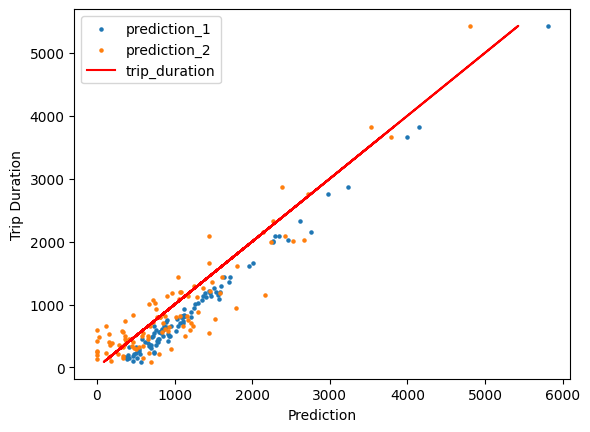

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Subsampling the data
n = int(df.shape[0]/100)
idx = np.arange(0, df.shape[0], n)
df_sub = df.iloc[idx]

# Scatter plot
plt.scatter(df_sub['prediction_1'], df_sub['trip_duration'], label='prediction_1', s=5)
plt.scatter(df_sub['prediction_2'], df_sub['trip_duration'], label='prediction_2', s=5)
plt.plot(df_sub['trip_duration'], df_sub['trip_duration'], color='red', label='trip_duration')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Trip Duration')
plt.show()


**Несимметричные метрики**

Зачастую, чтобы выбрать среди всего многообразия моделей, мы можем использовать несимметричные метрики. 

**MSE** и **MAE** относятся к симметричным. Они одинаково наказывают модель как за перепредсказание, так и за недопредсказание. Ошибки *+2* и *-2* переводятся **MSE** и **MAE** в одинаковую меру: **4** в первом случае и **2** во втором.

В действительности же, можно придумать целый ряд задач, когда лучше выбирать несимметричную метрику.

Представьте, что мы - дистрибьютор инсулина, и нам нужно построить модель, которая оптимизирует поставки. В таком случае кажется, что поставить лекарства на 2 единицы больше и на 2 единицы меньше - совершенно разные сценарии и разная интерпретация катастрофичности ошибки. 

В первом случае мы можем потерять немного прибыли, а во втором - лишить пациента жизненно важного лекарства. Поэтому хотелось бы научиться еще и по-разному оценивать *недо- и перепредсказания*. Для этого и используют несимметричные метрики! Одну из них предлагаю Вам посчитать ниже.

Рассчитайте **RMSLE**. Придумайте, как проверить характер несимметричности данной метрики: за что она наказывает больше - за перепредсказания или за недопредсказания? Это нужно будет в тестовом теоретическом задании.

$$
\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}
$$

Для взятия логарифма используйте библиотеку **math**

P.S. Очевидно, что для некоторых отрицательных предсказаний, формула не будет работать, так как логарифм от отрицательных значений взять нельзя. Поэтому давайте подкорректируем наши прогнозы: все отрицательные числа переведем в нули (лучше уж в нашей задаче предсказать *ноль секунд*, чем *минус 100 секунд*)

Переменные с метриками назовите *rmsle_1*, *rmsle_2*. Округлите их до 3 знаков после точки.

In [32]:
### Замените все отрицательные предсказания на 0
import numpy as np

df['prediction_1'] = np.where(df['prediction_1']<0, 0, df['prediction_1'])
df['prediction_2'] = np.where(df['prediction_2']<0, 0, df['prediction_2'])


In [34]:
import numpy as np

def rmsle(pred, actual):
    n = len(pred)
    return np.sqrt(np.sum((np.log(1 + pred) - np.log(1 + actual)) ** 2) / n)

actuals = df['trip_duration'].values

rmsle_1 = rmsle(df['prediction_1'].values, actuals)
rmsle_2 = rmsle(df['prediction_2'].values, actuals)


In [35]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 9.
print(f"RMSLE первой модели равно: {rmsle_1}")
print(f"RMSLE второй модели равно: {rmsle_2}")

RMSLE первой модели равно: 0.5537581774590482
RMSLE второй модели равно: 1.5564340528341787


Посчитайте, для какого количества объектов первая модель сделала перепредсказания и недопредсказания

Аналогичный расчет проведите для первой модели и недопредсказания.

P.S. оставьте колонку с предсказанием такой, какой она оказалась после замены отрицательных значений

Счетчики перепредсказаний и недопредсказаний назовите *over_predicted_1* и *under_predicted_1*

In [37]:
### Calculation of over-predictions and under-predictions for the first model
df['error_1'] = df['prediction_1'] - df['trip_duration']
df['error_category_1'] = np.where(df['error_1'] >= 0, 'over-prediction', 'under-prediction')

over_predicted_1 = len(df[df['error_category_1'] == 'over-prediction'])
under_predicted_1 = len(df[df['error_category_1'] == 'under-prediction'])


In [38]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 10.
print(f"Предсказания первой модели оказались больше действительных в {over_predicted_1} случаях")
print(f"Предсказания первой модели оказались меньше действительных в {under_predicted_1} случаях")

Предсказания первой модели оказались больше действительных в 1456721 случаях
Предсказания первой модели оказались меньше действительных в 1923 случаях


Аналогично для второй модели


Счетчики перепредсказаний и недопредсказаний назовите *over_predicted_2* и *under_predicted_2*

In [43]:
### Calculation of over-predictions and under-predictions for the second model
df['error_2'] = df['prediction_2'] - df['trip_duration']
df['error_category_2'] = np.where(df['error_2'] >= 0, 'over-prediction', 'under-prediction')

over_predicted_2 = len(df[df['error_category_2'] == 'over-prediction'])
under_predicted_2 = len(df[df['error_category_2'] == 'under-prediction'])

In [44]:
###Распечатайте значения для обеих моделей. Используйте эти значения для ответа на задание шага 11.
print(f"Предсказания второй модели оказались больше действительных в {over_predicted_2} случаях")
print(f"Предсказания второй модели оказались меньше действительных в {under_predicted_2} случаях")

Предсказания второй модели оказались больше действительных в 811778 случаях
Предсказания второй модели оказались меньше действительных в 646866 случаях


Сравните две модели заново. Согласуется ли полученный результат с подсчетом **RMSLE** ранее?